In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets, linear_model
from sklearn import cross_validation, svm
import os

data = np.zeros((2600,165*120))


def pca(X, wsp):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #rint "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    k = 1; 
    suma = np.sum(D)
    print Y_new.shape
    while(np.sum(D[-k:])/suma < wsp):
        k = k+1
    return Y_new[:,-k:], D[-k:], V[:,-k:], k


def PCA(X, k):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #print "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    #print Y_new
    return Y_new[:,-k:]


def nearestPoints(knownData,testData,k):
    D1 = np.sum(np.square(knownData),axis = 1,keepdims=True)
    D2 = np.sum(np.square(testData),axis = 1,keepdims=True).T
    M = D1 + D2 - 2. * np.dot(knownData,testData.T)
    #print M
    return np.asarray(np.argsort(M,axis=0)[:k,:].T)
    

def KNN(knownData, testData, knownClass, testClass,k):
    error = 0
    nearest = nearestPoints(knownData,testData,k)
    #print nearest
    length = testData.shape[0]
    nearestClass = np.empty(length)
    error_list = []
    for i in range(0,length):
        #print i,nearest[i]
        nearestClass[i] = np.argmax(np.bincount([knownClass[a] for a in nearest[i]]))
        if(not(nearestClass[i] == testClass[i])):
           error += 1
           error_list = np.append(error_list, [i])
    return error, error_list

from scipy import misc
from IPython.display import Image
#from PIL import Image
from IPython.display import display
def pokaz(i):
    zdj1 = data[i,:]
    #plt.figure(figsize=(10,4))
    image = zdj1.reshape(165,120)
    #plt.imshow(image)
    outfile = "photo_tmp.jpg"
    misc.imsave(outfile,image)
    p2 = Image(outfile)
    display(p2)

In [2]:
def loadPhoto(file):
    photo = misc.imread(file)
    R = photo[:, :, 0]
    G = photo[:, :, 1]
    B = photo[:, :, 2]
    img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    return img_gray.reshape(165*120,1)
def readAllPhotos(data):
    i = 0
    filenames = []
    for filename in os.listdir('lista7danefull'):
        if(filename.endswith(".bmp")):
            filenames.append('lista7danefull/'+filename)
            i += 1
    filenames = np.sort(filenames)
    for i in range(filenames.size):
        data[i,:] = loadPhoto(filenames[i])[:,0]

In [3]:
readAllPhotos(data)

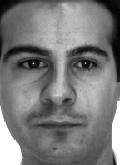

In [4]:
pokaz(0)

In [5]:
dataClass = [int((k-1)/26) + 1 for k in range(1,2601)]

In [6]:
def crossValidation(data,dataClass,k):
    size = data.shape[0]
    arr = np.arange(size)
    np.random.shuffle(arr)
    err = 0
    n = int(size/10)
    for i in range(10):
        mask2 = arr[np.arange(i*n,min((i+1)*n,size))]
        mask1 = arr[np.concatenate((np.arange(i*n),np.arange((i+1)*n,size)))]
        er = KNN(data[mask1],data[mask2],dataClass[mask1],dataClass[mask2],k)
        #print er
        err += er[0]
    return float(err)/(size) * 100

In [7]:
def everything(X,Xclass,k):
    Y = np.asarray(PCA(X,k))
    x1,x2 = zip(*np.random.permutation(zip(X,Xclass)))
    X1, X1class = np.asarray(x1),np.asarray(x2)
    y1,y2 = zip(*np.random.permutation(zip(Y,Xclass)))
    Y1, Y1class = np.asarray(y1),np.asarray(y2)
    for i in range(1,10):
        print i
        print "Dla oryginalnego zbioru:",crossValidation(X1,X1class,i),"%"
        print "Dla zredukowanych danych:",crossValidation(Y1,Y1class,i),"%"

In [8]:
def everything2(X,Xclass,k):
    Y, D, V, k1 = pca(X,k)
    print k1
    Y = np.asarray(Y)
    x1,x2 = zip(*np.random.permutation(zip(X,Xclass)))
    X1, X1class = np.asarray(x1),np.asarray(x2)
    y1,y2 = zip(*np.random.permutation(zip(Y,Xclass)))
    Y1, Y1class = np.asarray(y1),np.asarray(y2)
    for i in range(1,10):
        print i
        print "Dla oryginalnego zbioru:",crossValidation(X1,X1class,i), "%"
        print "Dla zredukowanych danych:",crossValidation(Y1,Y1class,i), "%"

In [9]:
everything2(data,dataClass,0.95) #127

(2600, 19800)
127
1
Dla oryginalnego zbioru: 38.8846153846 %
Dla zredukowanych danych: 5.92307692308 %
2
Dla oryginalnego zbioru: 55.8076923077 %
Dla zredukowanych danych: 11.5384615385 %
3
Dla oryginalnego zbioru: 61.5384615385 %
Dla zredukowanych danych: 10.8846153846 %
4
Dla oryginalnego zbioru: 64.8076923077 %
Dla zredukowanych danych: 10.5384615385 %
5
Dla oryginalnego zbioru: 67.1538461538 %
Dla zredukowanych danych: 9.76923076923 %
6
Dla oryginalnego zbioru: 69.7307692308 %
Dla zredukowanych danych: 9.92307692308 %
7
Dla oryginalnego zbioru: 71.0384615385 %
Dla zredukowanych danych: 9.92307692308 %
8
Dla oryginalnego zbioru: 73.3076923077 %
Dla zredukowanych danych: 10.6153846154 %
9
Dla oryginalnego zbioru: 73.0 %
Dla zredukowanych danych: 10.8076923077 %


In [10]:
N = 75
everything(data,dataClass,N)

1
Dla oryginalnego zbioru: 39.3461538462 %
Dla zredukowanych danych: 8.73076923077 %
2
Dla oryginalnego zbioru: 55.2307692308 %
Dla zredukowanych danych: 16.2307692308 %
3
Dla oryginalnego zbioru: 60.9230769231 %
Dla zredukowanych danych: 14.3846153846 %
4
Dla oryginalnego zbioru: 63.8461538462 %
Dla zredukowanych danych: 14.6538461538 %
5
Dla oryginalnego zbioru: 67.2692307692 %
Dla zredukowanych danych: 13.1923076923 %
6
Dla oryginalnego zbioru: 70.0769230769 %
Dla zredukowanych danych: 13.0769230769 %
7
Dla oryginalnego zbioru: 71.4230769231 %
Dla zredukowanych danych: 13.0384615385 %
8
Dla oryginalnego zbioru: 72.1538461538 %
Dla zredukowanych danych: 13.0 %
9
Dla oryginalnego zbioru: 73.7307692308 %
Dla zredukowanych danych: 13.2307692308 %


In [11]:
N = 100
everything(data,dataClass,N)

1
Dla oryginalnego zbioru: 38.3461538462 %
Dla zredukowanych danych: 6.73076923077 %
2
Dla oryginalnego zbioru: 55.2307692308 %
Dla zredukowanych danych: 13.3846153846 %
3
Dla oryginalnego zbioru: 61.1538461538 %
Dla zredukowanych danych: 11.6923076923 %
4
Dla oryginalnego zbioru: 64.6923076923 %
Dla zredukowanych danych: 11.4615384615 %
5
Dla oryginalnego zbioru: 67.2307692308 %
Dla zredukowanych danych: 10.7307692308 %
6
Dla oryginalnego zbioru: 70.5 %
Dla zredukowanych danych: 10.4230769231 %
7
Dla oryginalnego zbioru: 71.8076923077 %
Dla zredukowanych danych: 10.6153846154 %
8
Dla oryginalnego zbioru: 72.5384615385 %
Dla zredukowanych danych: 10.3076923077 %
9
Dla oryginalnego zbioru: 74.3461538462 %
Dla zredukowanych danych: 10.0384615385 %


In [12]:
N = 200
everything(data,dataClass,N)

1
Dla oryginalnego zbioru: 39.3461538462 %
Dla zredukowanych danych: 7.65384615385 %
2
Dla oryginalnego zbioru: 54.2692307692 %
Dla zredukowanych danych: 12.1923076923 %
3
Dla oryginalnego zbioru: 61.1923076923 %
Dla zredukowanych danych: 11.3076923077 %
4
Dla oryginalnego zbioru: 64.7307692308 %
Dla zredukowanych danych: 11.7307692308 %
5
Dla oryginalnego zbioru: 67.3846153846 %
Dla zredukowanych danych: 12.2307692308 %
6
Dla oryginalnego zbioru: 70.1153846154 %
Dla zredukowanych danych: 13.5384615385 %
7
Dla oryginalnego zbioru: 71.1538461538 %
Dla zredukowanych danych: 14.1923076923 %
8
Dla oryginalnego zbioru: 72.8461538462 %
Dla zredukowanych danych: 14.3846153846 %
9
Dla oryginalnego zbioru: 74.0384615385 %
Dla zredukowanych danych: 15.6538461538 %


In [ ]:
N = 500
everything(data,dataClass,N)

1
Dla oryginalnego zbioru: 38.8461538462 %
Dla zredukowanych danych: 22.3076923077 %
2
Dla oryginalnego zbioru: 56.0 %
Dla zredukowanych danych: 31.6153846154 %
3
Dla oryginalnego zbioru: 61.3846153846 %
Dla zredukowanych danych: 35.4615384615 %
4
Dla oryginalnego zbioru: 64.3846153846 %
Dla zredukowanych danych: 38.9615384615 %
5
Dla oryginalnego zbioru: 68.2307692308 %
Dla zredukowanych danych: 42.1153846154 %
6
Dla oryginalnego zbioru: 70.1153846154 %
Dla zredukowanych danych: 44.3076923077 %
7
Dla oryginalnego zbioru: 72.0384615385 %
Dla zredukowanych danych: 47.6538461538 %
8
Dla oryginalnego zbioru: 73.6153846154 %
Dla zredukowanych danych: 48.9230769231 %
9
Dla oryginalnego zbioru: 73.9615384615 %
Dla zredukowanych danych: 51.6923076923 %


In [ ]:
N = 1000
everything(data,dataClass,N)